In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:/Users/Admin/Downloads/Copper.csv')
df.shape

(181673, 14)

In [3]:
df.head(5)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

# # dealing with data in wrong format to correct format

In [5]:
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date

In [6]:
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')

In [7]:
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')

In [8]:
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')

In [9]:
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [10]:
df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05
mean,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,1.918036e+03
std,2.349081e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,3.317956e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


<AxesSubplot:xlabel='application'>

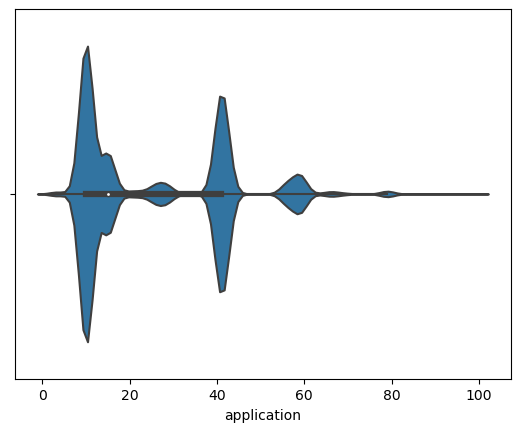

In [11]:
sns.violinplot(x=df["application"])

<AxesSubplot:xlabel='country'>

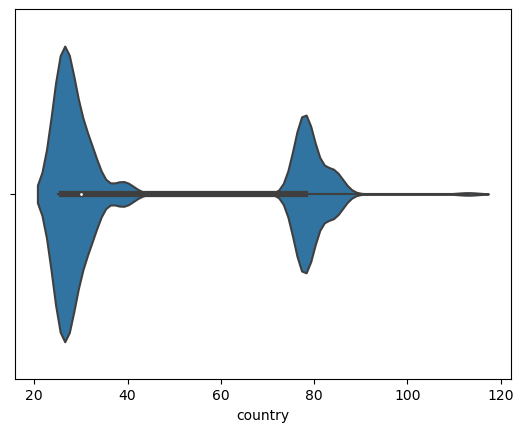

In [12]:
sns.violinplot(x=df["country"])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181670 non-null  object 
 13  selling_price  181672 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 19.4+ MB


In [14]:
df.isnull().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [15]:
 
df['material_ref'].fillna('unknown', inplace=True)

In [16]:
df.isnull().sum()

id                2
item_date         3
quantity tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
material_ref      0
product_ref       0
delivery date     3
selling_price     1
dtype: int64

In [17]:
df=df.dropna()

In [18]:
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

<AxesSubplot:>

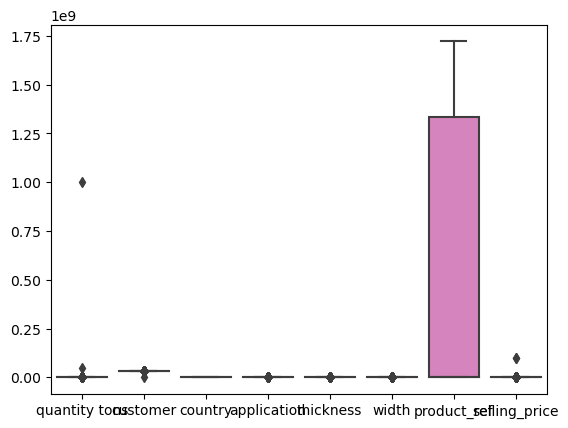

In [19]:
sns.boxplot(data = df)

In [20]:
dfr=df.copy()

In [21]:
a = dfr['selling_price'] <= 0
print(a.sum())
dfr.loc[a, 'selling_price'] = np.nan

a = dfr['quantity tons'] <= 0
print(a.sum())
dfr.loc[a, 'quantity tons'] = np.nan

a = dfr['thickness'] <= 0
print(a.sum())

7
4
0


In [22]:
dfr.isnull().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

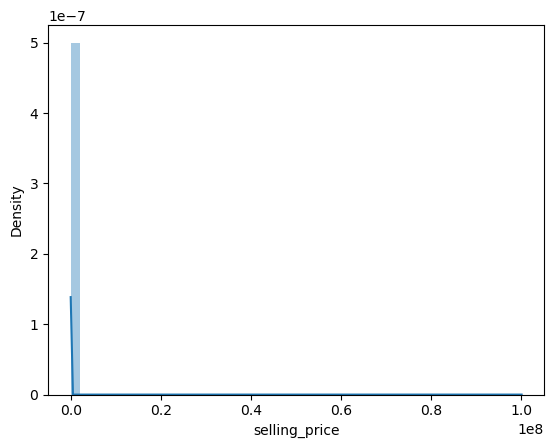

In [23]:
sns.distplot(dfr['selling_price'])
plt.show()

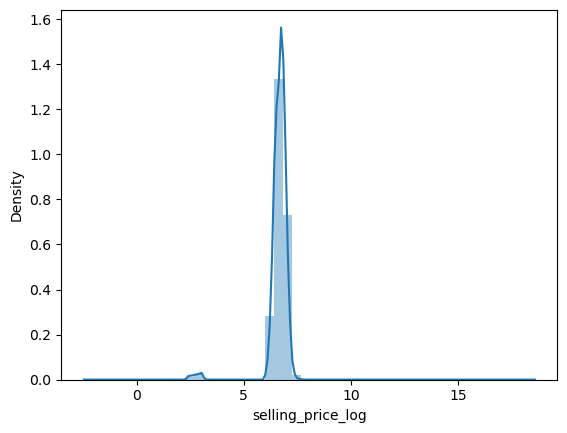

In [24]:
dfr['selling_price_log'] = np.log(dfr['selling_price'])
sns.distplot(dfr['selling_price_log'])
plt.show()

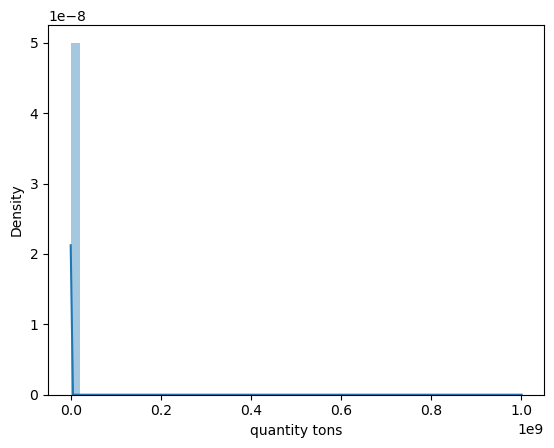

In [25]:
sns.distplot(dfr['quantity tons'])
plt.show()

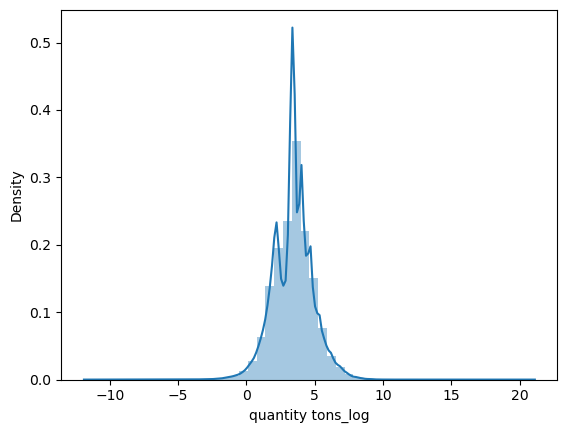

In [26]:
dfr['quantity tons_log'] = np.log(dfr['quantity tons'])
sns.distplot(dfr['quantity tons_log'])
plt.show()

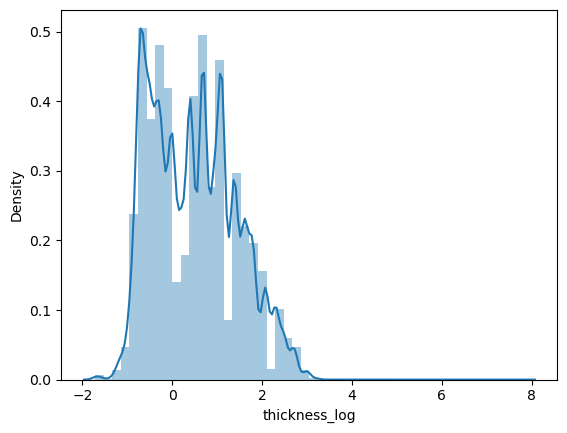

In [27]:
dfr['thickness_log'] = np.log(dfr['thickness'])
sns.distplot(dfr['thickness_log'])
plt.show()

In [28]:
#use ordinal encoder to convert categorical data into numerical data.
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
dfr.status = OE.fit_transform(dfr[['status']])
dfr['item type'] = OE.fit_transform(dfr[['item type']])

In [29]:
dfr = dfr.dropna()

In [30]:
# split data
X=dfr[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=dfr['selling_price_log']

In [31]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS.fit_transform(X)

array([[ 0.41506739,  0.70620108,  0.82144631, ..., -0.69225033,
        -0.75771563,  1.66790511],
       [ 2.25042993,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.29403459,  1.66498251],
       [ 1.77453529,  0.70620108,  1.76911846, ..., -0.61029817,
        -0.78103392, -0.65974878],
       ...,
       [ 1.34669579,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.31475754, -0.43186654],
       [-1.34846834,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.31475754, -0.43186654],
       [ 1.81043496,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.31475754, -0.43186654]])

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(127134, 9)
(54486, 9)
(127134,)
(54486,)


# import regression algorithm.

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
# prediction on Training data 
training_data_prediction = lr.predict(X_train)

In [36]:
from sklearn import metrics

In [37]:
# R squared Error 
train_error_score = metrics.r2_score(y_train, training_data_prediction) 
print("R squared Error - Training : ", train_error_score) 

R squared Error - Training :  0.0828767864024289


In [38]:
y_pred = lr.predict(X_test) 

In [39]:
# r squared error
test_error_score = metrics.r2_score(y_test, y_pred) 
print("R squared Error - Test: ", test_error_score) 

R squared Error - Test:  0.08558836864978947


In [40]:
# sns.regplot(y_test, y_pred, scatter_kws={"color": "green"}, line_kws={"color": "blue"}) 

In [41]:
print(lr.coef_)

[ 1.74827638e-02  5.05153759e-02  2.62405395e-03 -1.20672501e-03
 -9.27767090e-02  1.12861463e-05 -1.22559079e-03  1.35131206e-07
  3.14744032e-11]


In [42]:
print(lr.intercept_)

2.3136535414458095


In [43]:
pd.DataFrame(lr.coef_,X.columns, columns=['Coeff'])

,Coeff
quantity tons_log,1.748276e-02
status,5.051538e-02
item type,2.624054e-03
application,-1.206725e-03
thickness_log,-9.277671e-02
width,1.128615e-05
country,-1.225591e-03
customer,1.351312e-07
product_ref,3.147440e-11


In [44]:
y_pred = lr.predict(X_test)

In [45]:
metrics.mean_squared_error(y_test,y_pred)

0.2953277802580573

In [46]:
metrics.mean_absolute_error(y_test,y_pred)

0.2700228836845654

In [47]:
print(metrics.r2_score(y_test,y_pred))

0.08558836864978947


In [48]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

0.5434406869733415

In [49]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test,y_pred)

0.08563663546393796

In [50]:
y_test

168710    6.838405
44568     6.964136
177714    6.265301
27672     6.949856
51796     6.304449
            ...   
4454      6.918695
33995     7.195187
180465    7.111512
50064     7.114769
80329     6.881411
Name: selling_price_log, Length: 54486, dtype: float64

In [51]:
y_pred

array([6.51496343, 6.38150042, 6.67472492, ..., 6.74950311, 6.46921028,
       6.84673584])

In [52]:
# decision tree
dtr = DecisionTreeRegressor()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}


In [53]:
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}


In [54]:
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 0.02559260181241931
R-squared: 0.920758647380406


# classification

In [56]:
df['status'].value_counts()

Won                116004
Lost                34431
Not lost for AM     19568
Revised              4276
To be approved       4167
Draft                3121
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64

In [57]:
dfc = df.copy()

In [58]:
dfc = df[df['status'].isin(['Won','Lost'])]
len(dfc)

150435

In [59]:
dfc.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [60]:
dfc['status'].value_counts()

Won     116004
Lost     34431
Name: status, dtype: int64

In [61]:
# use ordinal encoder to convert catagorical data into numeric data
OE = OrdinalEncoder()
dfc['status'] = OE.fit_transform(dfc[['status']])
dfc['item type'] = OE.fit_transform(dfc[['item type']])

In [62]:
dfc.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [63]:
# split data
X = dfc[['quantity tons','customer','country','item type','application','thickness','width','selling_price','product_ref']]
y=dfc['status']


In [64]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS.fit_transform(X)

array([[-0.09139439, -0.72507203, -0.71017265, ...,  0.75953852,
         0.09705592,  1.6673573 ],
       [ 1.52755772, -0.2835426 , -0.83268141, ..., -0.33002279,
         0.76054292,  1.66443363],
       [ 0.66147626, -0.74727633, -0.62850015, ..., -1.29935665,
        -0.62373848, -0.66115687],
       ...,
       [-0.20459491, -0.30327554, -0.83268141, ..., -0.17973847,
        -0.71081685, -0.43319041],
       [-4.74988274, -0.30327554, -0.83268141, ..., -0.17973847,
        -0.77269647, -0.43319041],
       [ 0.70809988, -0.30327554, -0.83268141, ..., -0.21730955,
        -0.75206993, -0.43319041]])

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105304, 9)
(105304,)
(45131, 9)
(45131,)


In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [70]:
# decision tree classifier
dtc = DecisionTreeClassifier()
# fit the model
dtc.fit(X_train,y_train)
# evaluate model
y_pred = dtc.predict(X_test)


In [72]:
test_data_accuracy = accuracy_score(y_pred,y_test)
print("Test Data Accuracy Score :",test_data_accuracy)

Test Data Accuracy Score : 0.9112361791229975


In [74]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

con_mat = confusion_matrix(y_test,y_pred)
con_mat

array([[ 8404,  2023],
       [ 1983, 32721]], dtype=int64)

Text(33.22222222222222, 0.5, 'Truth')

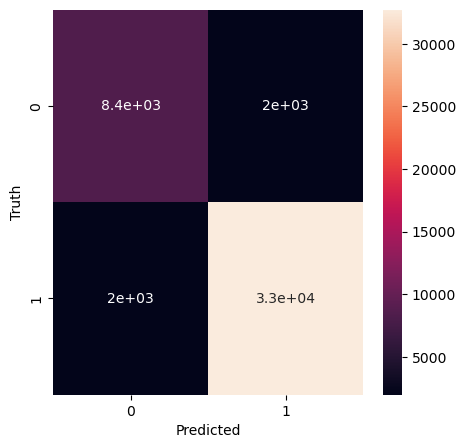

In [76]:
plt.figure(figsize = (5,5))
sns.heatmap(con_mat, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [77]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81     10427
         1.0       0.94      0.94      0.94     34704

    accuracy                           0.91     45131
   macro avg       0.88      0.87      0.87     45131
weighted avg       0.91      0.91      0.91     45131



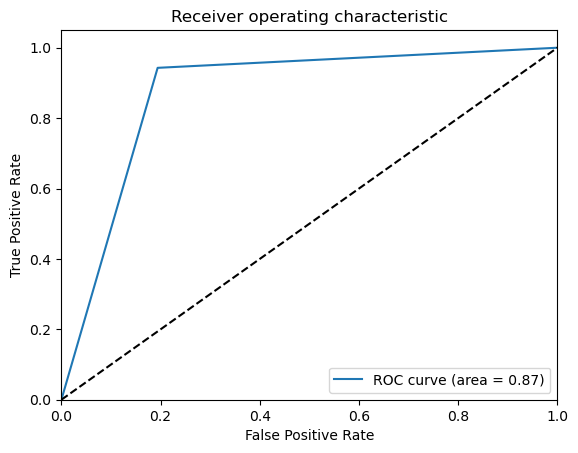

In [78]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()